In [ ]:
import numpy as np
import random as rnd
from sklearn import datasets
import matplotlib.pyplot as plt

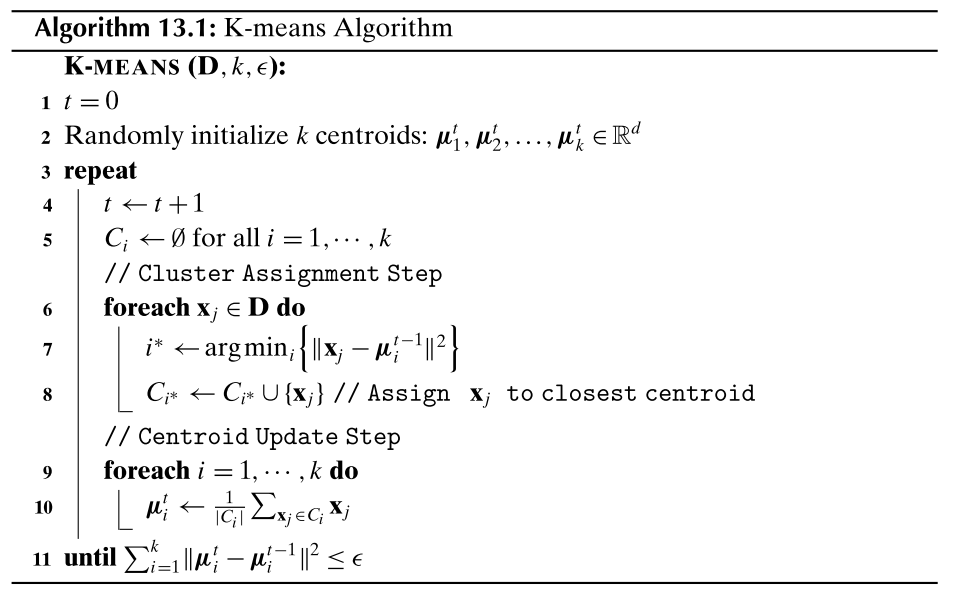

In [ ]:
def KMeans(D,k,e,verbose=False):
  mu=D[rnd.sample(range(len(D)),k),:]
  t=1
  while True:
    if verbose:
      print(f'step{t}: mu=\n',mu)
      print('-----------------------')
    C=[[] for i in range(k)]
    for j,Xj in enumerate(D):
      dist=((mu-Xj)**2).sum(axis=1)
      i=dist.argmin() 
      C[i].append(j)
    new_mu=mu.copy()
    for i in range(k):
      new_mu[i,:]=D[C[i],:].mean(axis=0)
    if np.sum((new_mu-mu)*(new_mu-mu))<=e:
      mu=new_mu.copy()
      break
    mu=new_mu.copy()
    t+=1
  if verbose:
      print(f'result: mu=\n',mu)
      print('-----------------------')
  return mu,C

def clusters_labels(N,C):
  labels=np.array([0]*N)
  for i,Ci in enumerate(C):
    labels[Ci]=i
  return labels
  

D = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
mu,C=KMeans(D,2,0,verbose=True)
for i in range(len(C)):
  print(f'C{i}=',C[i])
print(*[f'|C{i}|={len(C[i])}' for i in range(len(C))])
print('clusters labels=',clusters_labels(len(D),C))

step1: mu=
 [[10  4]
 [ 1  0]]
-----------------------
step2: mu=
 [[10  2]
 [ 1  2]]
-----------------------
result: mu=
 [[10  2]
 [ 1  2]]
-----------------------
C0= [3, 4, 5]
C1= [0, 1, 2]
|C0|=3 |C1|=3
clusters labels= [1 1 1 0 0 0]


Text(0.5, 0, 'x3')

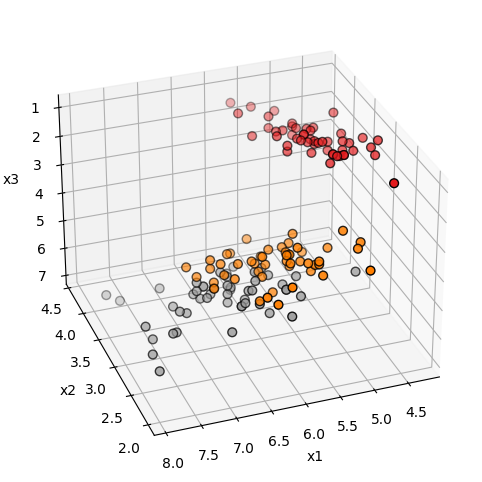

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, :3]  # we only take the first tree features.
y = iris.target

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

ax.scatter(
    X[:, 0],
    X[:, 1],
    X[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x3")


In [ ]:
k=3
mu,C=KMeans(iris.data,k,0,verbose=True)
for i in range(len(C)):
  print(f'C{i}=',C[i])
print(*[f'|C{i}|={len(C[i])}' for i in range(k)])

step1: mu=
 [[4.6 3.6 1.  0.2]
 [5.7 2.9 4.2 1.3]
 [4.9 2.5 4.5 1.7]]
-----------------------
step2: mu=
 [[5.006      3.428      1.462      0.246     ]
 [6.30736842 2.89052632 4.92210526 1.66842105]
 [5.4        2.52       4.6        1.82      ]]
-----------------------
step3: mu=
 [[5.006      3.428      1.462      0.246     ]
 [6.56619718 2.97323944 5.25211268 1.82535211]
 [5.51724138 2.62413793 4.05862069 1.31034483]]
-----------------------
step4: mu=
 [[5.006      3.428      1.462      0.246     ]
 [6.59375    2.984375   5.3734375  1.9078125 ]
 [5.67222222 2.67222222 4.075      1.26388889]]
-----------------------
step5: mu=
 [[5.006      3.428      1.462      0.246     ]
 [6.62833333 3.00166667 5.415      1.93      ]
 [5.7125     2.6775     4.1425     1.295     ]]
-----------------------
step6: mu=
 [[5.006      3.428      1.462      0.246     ]
 [6.65090909 3.01090909 5.48727273 1.96545455]
 [5.78666667 2.70222222 4.19555556 1.32222222]]
-----------------------
step7: mu=
 [[5.

In [ ]:
print('Class0=',*np.where(y==0))
print('Class1=',*np.where(y==1))
print('Class2=',*np.where(y==2))

Class0= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
Class1= [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]
Class2= [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]


In [ ]:
clustersLabels=clusters_labels(len(y),C)
print('clusters labels=',clustersLabels)
print('class labels=',y)

clusters labels= [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
class labels= [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


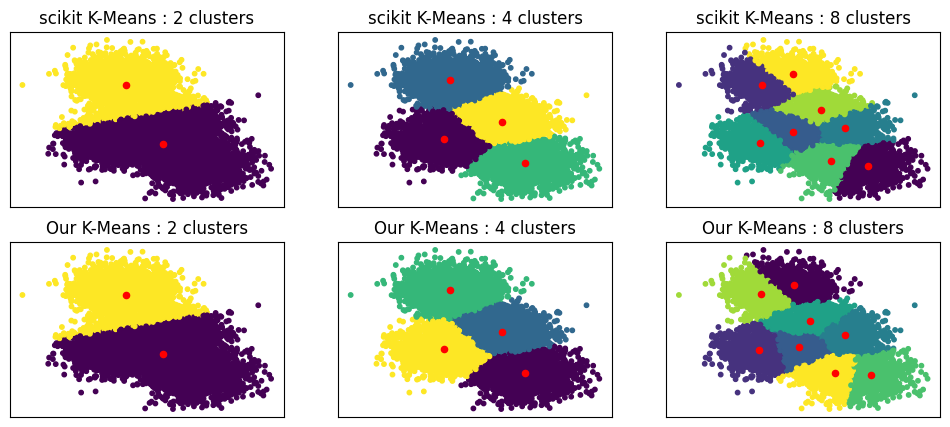

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans as scikit_KMeans
# Generate sample data
n_samples = 10000
random_state = 0

X, _ = make_blobs(n_samples=n_samples, centers=4, random_state=random_state)

# Number of cluster centers for KMeans and BisectingKMeans
n_clusters_list = [2, 4, 8]

# Algorithms to compare
clustering_algorithms = {
    "scikit K-Means": scikit_KMeans,
    "Our K-Means": KMeans,
}

# Make subplots for each variant
fig, axs = plt.subplots(
    len(clustering_algorithms), len(n_clusters_list), figsize=(12, 5)
)

axs = axs.T

for i, (algorithm_name, Algorithm) in enumerate(clustering_algorithms.items()):
    for j, n_clusters in enumerate(n_clusters_list):
        if algorithm_name== "scikit K-Means":
          algo = Algorithm(n_clusters=n_clusters, random_state=random_state, n_init=3)
          algo.fit(X)
          centers = algo.cluster_centers_
          clustersLabels=algo.labels_
        else:
          centers,C=KMeans(X,n_clusters,1e-9)
          clustersLabels=clusters_labels(len(X),C)

        axs[j, i].scatter(X[:, 0], X[:, 1], s=10, c=clustersLabels)
        axs[j, i].scatter(centers[:, 0], centers[:, 1], c="r", s=20)

        axs[j, i].set_title(f"{algorithm_name} : {n_clusters} clusters")


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

[@scikit-learn](https://scikit-learn.org/stable/auto_examples/cluster/plot_bisect_kmeans.html#sphx-glr-auto-examples-cluster-plot-bisect-kmeans-py)

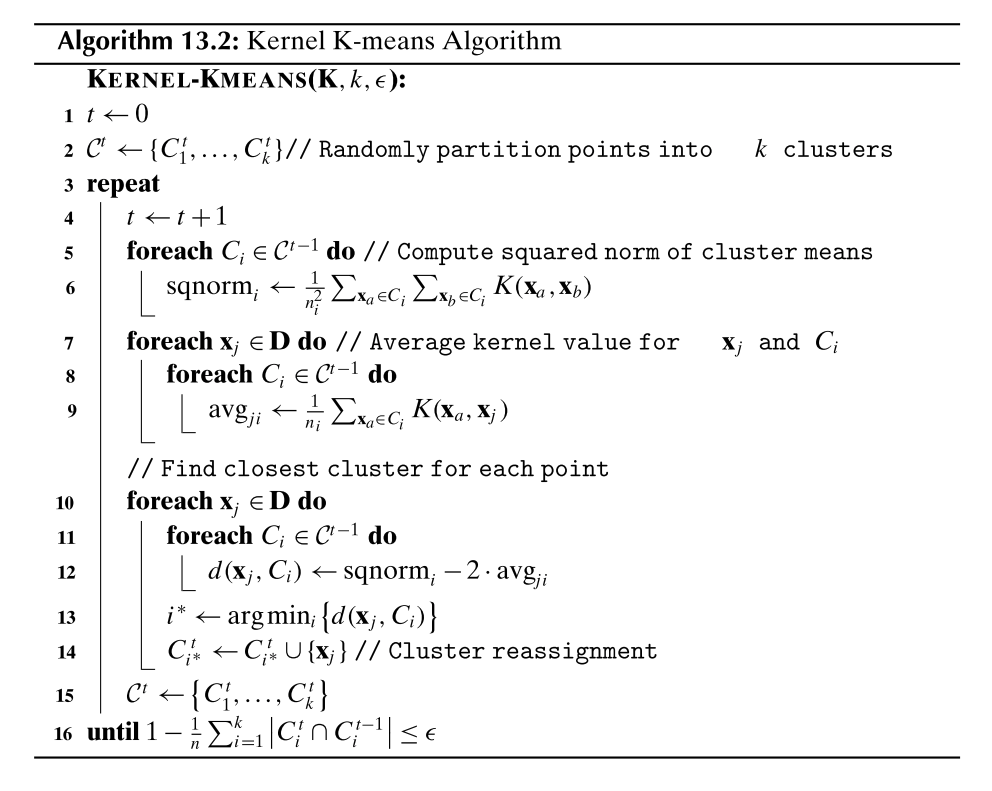

In [ ]:
def kernelFuncPoly(X, p):
    '''
    polynominal function
    k(x1,x2) = (1+x1 * x2) ^p
    '''
    return (1 + X@X.T)**p

def kernelFuncGaussian(X,s):
    '''
    gaussian function (RBF)
    k(x1,x2) = exp(-0.5(||x2-x1||/s)^2)
    '''
    Z=[]
    for Xi in X:
      dist_i=((X-Xi)*(X-Xi)).sum(axis=1)
      Z.append(dist_i/s**2)
    Z=np.array(Z)
    return np.exp(-0.5*Z**2)


#randomly partition points into k clusters
def partition(X, k):
    avg = len(X) / float(k)
    out = []
    last = 0.0
    seq=list(range(len(X)))
    rnd.shuffle(seq)
    while last < len(seq):
        out.append(seq[int(last):int(last + avg)])
        last += avg
    return out

D = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
kernelFuncGaussian(D,1)

array([[1.00000000e+00, 3.35462628e-04, 3.35462628e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.35462628e-04, 1.00000000e+00, 2.57220937e-56, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.35462628e-04, 2.57220937e-56, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        3.35462628e-04, 3.35462628e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.35462628e-04,
        1.00000000e+00, 2.57220937e-56],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.35462628e-04,
        2.57220937e-56, 1.00000000e+00]])

In [ ]:
def KernelKMeans(K,k,e,verbose=False):
  C=partition(K, k)
  t=1
  while True:
      if verbose:
        print(f'step{t}: clusters=\n',C)
        print('-----------------------')
      sqnorm=np.zeros(k)
      for i in range(k):
          sqnorm[i]=np.mean(K[C[i],C[i]])
      Cp=[[] for i in range(k)]
      for j in range(len(K)):
          dist=np.zeros(k)
          for i in range(len(C)):
            dist[i]=sqnorm[i]-np.mean(K[C[i],j])
          i=dist.argmin() 
          Cp[i].append(j)
      intersection=0
      for i in range(len(C)):
            intersection+=len(set(Cp[i]).intersection(set(C[i])))
      if 1-intersection/len(K)<=e:
          C=Cp.copy()
          break
      C=Cp.copy()
      t+=1
  if verbose:
        print(f'result: clusters=\n',C)
        print('-----------------------')
  return C

def clusters_labels(N,C):
  labels=np.array([0]*N)
  for i,Ci in enumerate(C):
    labels[Ci]=i
  return labels
  

D = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
K=kernelFuncGaussian(D,2)
C=KernelKMeans(K,2,0,verbose=True)

for i in range(len(C)):
  print(f'C{i}=',C[i])
print(*[f'|C{i}|={len(C[i])}' for i in range(len(C))])
print('clusters labels=',clusters_labels(len(D),C))

step1: clusters=
 [[3, 0, 2], [1, 5, 4]]
-----------------------
step2: clusters=
 [[0, 2], [1, 3, 4, 5]]
-----------------------
step3: clusters=
 [[0, 1, 2], [3, 4, 5]]
-----------------------
result: clusters=
 [[0, 1, 2], [3, 4, 5]]
-----------------------
C0= [0, 1, 2]
C1= [3, 4, 5]
|C0|=3 |C1|=3
clusters labels= [0 0 0 1 1 1]


Text(0.5, 0, 'x3')

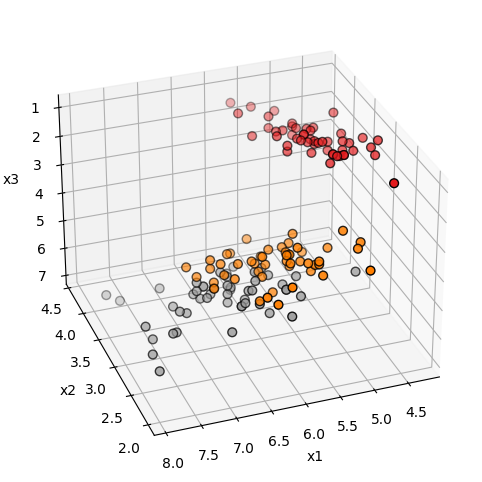

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, :3]  # we only take the first tree features.
y = iris.target

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

ax.scatter(
    X[:, 0],
    X[:, 1],
    X[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x3")


In [ ]:
k=3
K=kernelFuncGaussian(iris.data,2)
C=KernelKMeans(K,k,0,verbose=True)
for i in range(len(C)):
  print(f'C{i}=',C[i])
print(*[f'|C{i}|={len(C[i])}' for i in range(k)])

step1: clusters=
 [[91, 38, 126, 85, 76, 40, 34, 118, 69, 23, 8, 131, 82, 98, 15, 102, 1, 19, 66, 86, 13, 35, 128, 90, 65, 124, 4, 52, 94, 33, 104, 49, 45, 51, 22, 119, 21, 88, 62, 83, 54, 144, 74, 89, 5, 113, 44, 80, 112, 28], [130, 114, 140, 42, 133, 103, 41, 17, 96, 145, 29, 136, 12, 18, 141, 143, 146, 67, 100, 125, 68, 43, 0, 30, 123, 120, 116, 20, 129, 121, 48, 106, 117, 47, 108, 3, 95, 72, 135, 59, 53, 107, 110, 87, 99, 138, 60, 105, 9, 11], [77, 57, 97, 56, 84, 142, 71, 58, 79, 139, 36, 127, 16, 64, 109, 6, 37, 132, 93, 46, 61, 122, 70, 73, 10, 148, 92, 25, 111, 39, 101, 31, 50, 81, 149, 2, 14, 24, 147, 134, 7, 63, 26, 78, 137, 32, 55, 115, 27, 75]]
-----------------------
step2: clusters=
 [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 98], [52, 77, 100, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 120, 12

In [ ]:
clustersLabels=clusters_labels(len(y),C)
print('clusters labels=',clustersLabels)
print('class labels=',y)

clusters labels= [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
class labels= [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


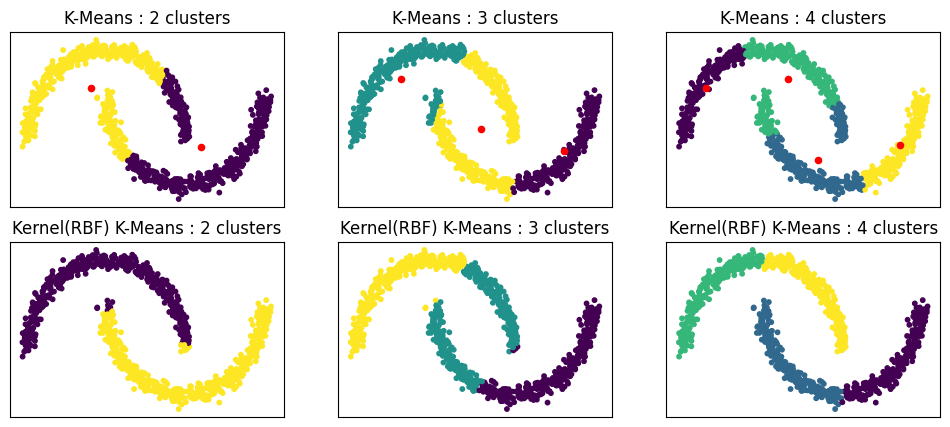

In [ ]:
from sklearn.datasets import make_moons
# Generate sample data
n_samples = 1000
random_state = 0

X,_= make_moons(n_samples=n_samples, noise=0.05)
sigma=0.5
K=kernelFuncGaussian(X,sigma)
# Number of cluster centers for KMeans 
n_clusters_list = [2, 3, 4]

# Algorithms to compare
clustering_algorithms = {
    "K-Means": KMeans,
    "Kernel(RBF) K-Means": KernelKMeans,
}

# Make subplots for each variant
fig, axs = plt.subplots(
    len(clustering_algorithms), len(n_clusters_list), figsize=(12, 5)
)

axs = axs.T

for i, (algorithm_name, Algorithm) in enumerate(clustering_algorithms.items()):
    for j, n_clusters in enumerate(n_clusters_list):
        if algorithm_name== "Kernel(RBF) K-Means":
          C=KernelKMeans(K,n_clusters,0)
          clustersLabels=clusters_labels(len(X),C)
        else:
          centers,C=KMeans(X,n_clusters,1e-9)
          clustersLabels=clusters_labels(len(X),C)

        axs[j, i].scatter(X[:, 0], X[:, 1], s=10, c=clustersLabels)
        if algorithm_name== "K-Means":
          axs[j, i].scatter(centers[:, 0], centers[:, 1], c="r", s=20)

        axs[j, i].set_title(f"{algorithm_name} : {n_clusters} clusters")


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

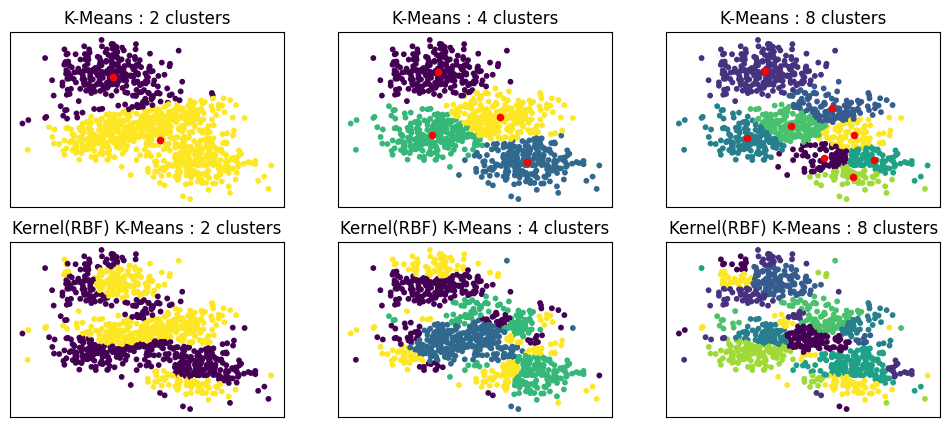

In [ ]:
# Generate sample data
n_samples = 1000
random_state = 0

X,_= make_blobs(n_samples=n_samples, centers=4, random_state=random_state)
sigma=0.5
K=kernelFuncGaussian(X,sigma)
# Number of cluster centers for KMeans 
n_clusters_list = [2, 4, 8]

# Algorithms to compare
clustering_algorithms = {
    "K-Means": KMeans,
    "Kernel(RBF) K-Means": KernelKMeans,
}

# Make subplots for each variant
fig, axs = plt.subplots(
    len(clustering_algorithms), len(n_clusters_list), figsize=(12, 5)
)

axs = axs.T

for i, (algorithm_name, Algorithm) in enumerate(clustering_algorithms.items()):
    for j, n_clusters in enumerate(n_clusters_list):
        if algorithm_name== "Kernel(RBF) K-Means":
          C=KernelKMeans(K,n_clusters,0)
          clustersLabels=clusters_labels(len(X),C)
        else:
          centers,C=KMeans(X,n_clusters,1e-9)
          clustersLabels=clusters_labels(len(X),C)

        axs[j, i].scatter(X[:, 0], X[:, 1], s=10, c=clustersLabels)
        if algorithm_name== "K-Means":
          axs[j, i].scatter(centers[:, 0], centers[:, 1], c="r", s=20)

        axs[j, i].set_title(f"{algorithm_name} : {n_clusters} clusters")


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()